This notebook reads in the number of Covid-19 infected persons in Austria as indicated in the Wikipedia page for that country related to the 2020 coronavirus pandemic. 

https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Austria

The data is fetched from the wikidata knowledge base (https://www.wikidata.org/wiki/Wikidata:Main_Page). To fetch the data underlying the page 
https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_Austria 
we use the item code for that page: Q86847911. 
You can change the country by replacing that item code below with the corresponding item code for the country page. 
The wikidata item code of a page can be found by clicking "Wikidata item" under Tools on the left side of the wikipedia page. 

In [76]:
import requests
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt

# read in cases from wikidata entry Q86847911 ("2020 coronavirus outbreak in Austria")

In [77]:
url = 'https://query.wikidata.org/sparql'
query = """
SELECT
  ?nrcases ?timepoint
WHERE {
  wd:Q86847911 p:P1603 ?p .
  ?p pq:P585 ?timepoint ;
     ps:P1603 ?nrcases .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

r = requests.get(url, params={'format': 'json', 'query': query}) #execute the query
data = r.json()

cases = []
#cleans the data because some values are missing
for item in data['results']['bindings']:
    cases.append(OrderedDict({'time': item['timepoint']['value'],
'nrcases': item['nrcases']['value']
}))
    
df_wikidata=pd.DataFrame(cases)
print(df_wikidata['time'].values)

['2020-03-10T00:00:00Z' '2020-02-28T00:00:00Z' '2020-02-26T00:00:00Z'
 '2020-02-27T00:00:00Z' '2020-03-01T00:00:00Z' '2020-03-02T00:00:00Z'
 '2020-03-09T00:00:00Z' '2020-03-16T00:00:00Z' '2020-03-08T00:00:00Z'
 '2020-03-04T00:00:00Z' '2020-03-03T00:00:00Z' '2020-03-12T00:00:00Z'
 '2020-02-29T00:00:00Z' '2020-03-11T00:00:00Z' '2020-03-13T00:00:00Z'
 '2020-03-06T00:00:00Z' '2020-03-15T00:00:00Z' '2020-03-14T00:00:00Z'
 '2020-03-07T00:00:00Z' '2020-03-05T00:00:00Z' '2020-03-17T00:00:00Z'
 '2020-03-18T00:00:00Z' '2020-03-19T00:00:00Z']


In [78]:
import datetime

dates = df_wikidata['time'].values
cases = df_wikidata['nrcases'].values

for ind in list(range(len(cases))): 
    cases[ind] = int(cases[ind])
    dates[ind] = datetime.datetime.strptime(dates[ind],"%Y-%m-%dT%H:%M:%SZ")

#for time_cases in df_wikidata.values:
#    time = time_cases[0]
#    nrcases.append(time_cases[1])
#    print(time)

In [79]:
ts = pd.Series(cases,dates)

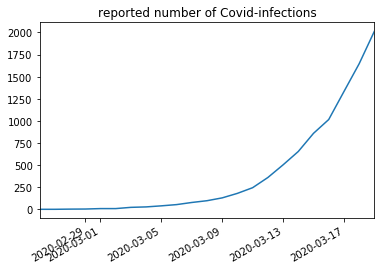

In [82]:
ts.plot(title="reported number of Covid-infections")